# Practice Burnup pincell
## Geometry and depletion practice
### 16 October 2022

In [1]:
import openmc
import openmc.deplete
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

## Materials

In [2]:
# create fuel material
fuel = openmc.Material(name="uo2")
fuel.add_element("U", 1, percent_type="ao", enrichment=3)
fuel.add_element("O", 2)
fuel.set_density("g/cc", 10.5)
# create clad
clad = openmc.Material(name='clad')
clad.add_element("Zr", 1)
clad.set_density("g/cc", 6.0)
#create water
water = openmc.Material(name="water")
water.add_element("H",2)
water.add_element("O",1)
water.set_density("g/cc",0.712)
water.add_s_alpha_beta('c_H_in_H2O')

materials = openmc.Materials([fuel, clad, water])

## Create Geometry
pincell geometry for burnup calculation

In [3]:
h_cell = 300; # height of pincell

r_fuel = 0.42; # fuel radius
r_pin = 0.45; # clad radius

P_D = 1.4; # pitch to diameter ratio
pitch = P_D*(2*r_pin);

fuel_temp = 900; # representaive fuel temperature (K)
mod_temp = 600; # moderator temp (K)

# fuel cylinder
fuel_cyl = openmc.model.RightCircularCylinder([0,0,-h_cell/2],h_cell,r_fuel);

fuel.volume = np.pi*(r_fuel**2)*h_cell;

# pin cylinder
pin_cyl = openmc.model.RightCircularCylinder([0,0,-(h_cell+(r_pin-r_fuel))/2],h_cell+(r_pin-r_fuel)*2,r_pin);

# pin cell container

core_cell = openmc.model.RectangularParallelepiped(-pitch/2,pitch/2,
                                                   -pitch/2,pitch/2,
                                                   -(h_cell+100)/2,(h_cell+100)/2,
                                                   boundary_type = "reflective");
fuel_cell = openmc.Cell();
fuel_cell.region = -fuel_cyl
fuel_cell.fill = fuel;
fuel_cell.temperature = fuel_temp;

clad_cell = openmc.Cell();
clad_cell.region = +fuel_cyl & -pin_cyl;
clad_cell.fill = clad;

mod_cell = openmc.Cell();
mod_cell.region = +pin_cyl & - core_cell;
mod_cell.fill = water;
mod_cell.temperature = mod_temp;

root_univ = openmc.Universe();
root_univ.add_cells([fuel_cell,clad_cell,mod_cell]);

geometry = openmc.Geometry();
geometry.root_universe = root_univ;

materials.export_to_xml();
geometry.export_to_xml();


# create criticality settings

In [4]:
settings = openmc.Settings();
settings.run_mode = 'eigenvalue';
settings.particles = 20000;
settings.batches = 250;
settings.inactive = 50;

box = openmc.stats.Box(lower_left = (-r_fuel,-r_fuel,-h_cell/2),
                      upper_right = (r_fuel,r_fuel,h_cell/2),
                      only_fissionable=True);
src = openmc.Source(space=box);

settings.source = src;
settings.temperature['method']='interpolation';
settings.export_to_xml();

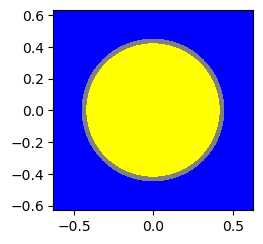

In [5]:
# create color dictionary
colors = {}
colors[water]='blue';
colors[fuel]='yellow';
colors[clad]='gray';

# plot pin cell universe to inspect geometry
root_univ.plot(width=(pitch,pitch),color_by='material',colors=colors);

# Conduct Depletion Calculation

In [6]:
model = openmc.model.Model(geometry,materials,settings)
operator = openmc.deplete.CoupledOperator(model,"chain_endfb71_pwr.xml");

# typical PWR power density
power_density = 30.5; # power density W/gHM
days = 24*3600;
time_steps = [0.5*days,0.5*days,1*days,5*days,
              23*days,150*days,365*days,365*days,
              365*days,365*days];
cecm = openmc.deplete.CECMIntegrator(operator,time_steps,power_density=power_density);

#repeat_depletion = False;

#if(repeat_depletion):
#    cecm.integrate()

cecm.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Na23 from /home/m231326/omc_data/endfb71_hdf5/Na23.h5
 Reading Mg24 from /home/m231326/omc_data/endfb71_hdf5/Mg24.h5
 Reading Mg25 from /home/m231326/omc_data/endfb71_hdf5/Mg25.h5
 Reading Mg26 from /home/m231326/omc_data/endfb71_hdf5/Mg26.h5
 Reading Al27 from /home/m231326/omc_data/endfb71_hdf5/Al27.h5
 Reading Si28 from /home/m231326/omc_data/endfb71_hdf5/Si28.h5
 Reading Si29 from /home/m231326/omc_data/endfb71_hdf5/Si29.h5
 Reading Si30 from /home/m231326/omc_data/endfb71_hdf5/Si30.h5
 Reading P31 from /home/m231326/omc_data/endfb71_hdf5/P31.h5
 Reading S32 from /home/m231326/omc_data/endfb71_hdf5/S32.h5
 Reading S33 from /home/m231326/omc_data/endfb71_hdf5/S33.h5
 Reading S34 from /home/m231326/omc_data/endfb71_hdf5/S34.h5
 Reading S36 from /home/m231326/omc_data/endfb71_hdf5/S36.h5
 Reading Cl35 from /home/m231326/omc_data/endfb71_hdf5/Cl35.h5
 Reading Cl37 from /home/m231326/omc_data/endfb71_hdf5/Cl37.h5
 Reading Ar36 from /home/m231326/omc_data/endfb71_hdf5/Ar36.h5


 Reading Ar38 from /home/m231326/omc_data/endfb71_hdf5/Ar38.h5
 Reading Ar40 from /home/m231326/omc_data/endfb71_hdf5/Ar40.h5
 Reading K39 from /home/m231326/omc_data/endfb71_hdf5/K39.h5
 Reading K40 from /home/m231326/omc_data/endfb71_hdf5/K40.h5
 Reading K41 from /home/m231326/omc_data/endfb71_hdf5/K41.h5
 Reading Ca40 from /home/m231326/omc_data/endfb71_hdf5/Ca40.h5
 Reading Ca42 from /home/m231326/omc_data/endfb71_hdf5/Ca42.h5
 Reading Ca43 from /home/m231326/omc_data/endfb71_hdf5/Ca43.h5
 Reading Ca44 from /home/m231326/omc_data/endfb71_hdf5/Ca44.h5
 Reading Ca46 from /home/m231326/omc_data/endfb71_hdf5/Ca46.h5
 Reading Ca48 from /home/m231326/omc_data/endfb71_hdf5/Ca48.h5
 Reading Sc45 from /home/m231326/omc_data/endfb71_hdf5/Sc45.h5
 Reading Ti46 from /home/m231326/omc_data/endfb71_hdf5/Ti46.h5
 Reading Ti47 from /home/m231326/omc_data/endfb71_hdf5/Ti47.h5
 Reading Ti48 from /home/m231326/omc_data/endfb71_hdf5/Ti48.h5
 Reading Ti49 from /home/m231326/omc_data/endfb71_hdf5/Ti49.h

 Reading Se80 from /home/m231326/omc_data/endfb71_hdf5/Se80.h5
 Reading Se82 from /home/m231326/omc_data/endfb71_hdf5/Se82.h5
 Reading Br79 from /home/m231326/omc_data/endfb71_hdf5/Br79.h5
 Reading Br81 from /home/m231326/omc_data/endfb71_hdf5/Br81.h5
 Reading Kr78 from /home/m231326/omc_data/endfb71_hdf5/Kr78.h5
 Reading Kr80 from /home/m231326/omc_data/endfb71_hdf5/Kr80.h5
 Reading Kr82 from /home/m231326/omc_data/endfb71_hdf5/Kr82.h5
 Reading Kr83 from /home/m231326/omc_data/endfb71_hdf5/Kr83.h5
 Reading Kr84 from /home/m231326/omc_data/endfb71_hdf5/Kr84.h5
 Reading Kr85 from /home/m231326/omc_data/endfb71_hdf5/Kr85.h5
 Reading Kr86 from /home/m231326/omc_data/endfb71_hdf5/Kr86.h5
 Reading Rb85 from /home/m231326/omc_data/endfb71_hdf5/Rb85.h5
 Reading Rb86 from /home/m231326/omc_data/endfb71_hdf5/Rb86.h5
 Reading Rb87 from /home/m231326/omc_data/endfb71_hdf5/Rb87.h5
 Reading Sr84 from /home/m231326/omc_data/endfb71_hdf5/Sr84.h5
 Reading Sr86 from /home/m231326/omc_data/endfb71_hdf5/

 Reading Nb95 from /home/m231326/omc_data/endfb71_hdf5/Nb95.h5
 Reading Mo92 from /home/m231326/omc_data/endfb71_hdf5/Mo92.h5
 Reading Mo94 from /home/m231326/omc_data/endfb71_hdf5/Mo94.h5
 Reading Mo95 from /home/m231326/omc_data/endfb71_hdf5/Mo95.h5
 Reading Mo96 from /home/m231326/omc_data/endfb71_hdf5/Mo96.h5
 Reading Mo97 from /home/m231326/omc_data/endfb71_hdf5/Mo97.h5
 Reading Mo98 from /home/m231326/omc_data/endfb71_hdf5/Mo98.h5
 Reading Mo99 from /home/m231326/omc_data/endfb71_hdf5/Mo99.h5
 Reading Mo100 from /home/m231326/omc_data/endfb71_hdf5/Mo100.h5
 Reading Tc99 from /home/m231326/omc_data/endfb71_hdf5/Tc99.h5


 Reading Ru96 from /home/m231326/omc_data/endfb71_hdf5/Ru96.h5
 Reading Ru98 from /home/m231326/omc_data/endfb71_hdf5/Ru98.h5
 Reading Ru99 from /home/m231326/omc_data/endfb71_hdf5/Ru99.h5
 Reading Ru100 from /home/m231326/omc_data/endfb71_hdf5/Ru100.h5
 Reading Ru101 from /home/m231326/omc_data/endfb71_hdf5/Ru101.h5
 Reading Ru102 from /home/m231326/omc_data/endfb71_hdf5/Ru102.h5
 Reading Ru103 from /home/m231326/omc_data/endfb71_hdf5/Ru103.h5
 Reading Ru104 from /home/m231326/omc_data/endfb71_hdf5/Ru104.h5
 Reading Ru105 from /home/m231326/omc_data/endfb71_hdf5/Ru105.h5
 Reading Ru106 from /home/m231326/omc_data/endfb71_hdf5/Ru106.h5
 Reading Rh103 from /home/m231326/omc_data/endfb71_hdf5/Rh103.h5
 Reading Rh105 from /home/m231326/omc_data/endfb71_hdf5/Rh105.h5
 Reading Pd102 from /home/m231326/omc_data/endfb71_hdf5/Pd102.h5
 Reading Pd104 from /home/m231326/omc_data/endfb71_hdf5/Pd104.h5
 Reading Pd105 from /home/m231326/omc_data/endfb71_hdf5/Pd105.h5
 Reading Pd106 from /home/m2313

          1200K
          2500K


 Reading Cd110 from /home/m231326/omc_data/endfb71_hdf5/Cd110.h5
 Reading Cd111 from /home/m231326/omc_data/endfb71_hdf5/Cd111.h5
 Reading Cd112 from /home/m231326/omc_data/endfb71_hdf5/Cd112.h5
 Reading Cd113 from /home/m231326/omc_data/endfb71_hdf5/Cd113.h5
 Reading Cd114 from /home/m231326/omc_data/endfb71_hdf5/Cd114.h5
 Reading Cd115_m1 from /home/m231326/omc_data/endfb71_hdf5/Cd115_m1.h5
 Reading Cd116 from /home/m231326/omc_data/endfb71_hdf5/Cd116.h5
 Reading In113 from /home/m231326/omc_data/endfb71_hdf5/In113.h5
 Reading In115 from /home/m231326/omc_data/endfb71_hdf5/In115.h5
 Reading Sn112 from /home/m231326/omc_data/endfb71_hdf5/Sn112.h5
 Reading Sn113 from /home/m231326/omc_data/endfb71_hdf5/Sn113.h5
 Reading Sn114 from /home/m231326/omc_data/endfb71_hdf5/Sn114.h5
 Reading Sn115 from /home/m231326/omc_data/endfb71_hdf5/Sn115.h5
 Reading Sn116 from /home/m231326/omc_data/endfb71_hdf5/Sn116.h5
 Reading Sn117 from /home/m231326/omc_data/endfb71_hdf5/Sn117.h5
 Reading Sn118 from

          1200K
          2500K


 Reading Sn126 from /home/m231326/omc_data/endfb71_hdf5/Sn126.h5
 Reading Sb121 from /home/m231326/omc_data/endfb71_hdf5/Sb121.h5
 Reading Sb123 from /home/m231326/omc_data/endfb71_hdf5/Sb123.h5
 Reading Sb124 from /home/m231326/omc_data/endfb71_hdf5/Sb124.h5
 Reading Sb125 from /home/m231326/omc_data/endfb71_hdf5/Sb125.h5
 Reading Sb126 from /home/m231326/omc_data/endfb71_hdf5/Sb126.h5
 Reading Te120 from /home/m231326/omc_data/endfb71_hdf5/Te120.h5
 Reading Te122 from /home/m231326/omc_data/endfb71_hdf5/Te122.h5
 Reading Te123 from /home/m231326/omc_data/endfb71_hdf5/Te123.h5
 Reading Te124 from /home/m231326/omc_data/endfb71_hdf5/Te124.h5
 Reading Te125 from /home/m231326/omc_data/endfb71_hdf5/Te125.h5
 Reading Te126 from /home/m231326/omc_data/endfb71_hdf5/Te126.h5


          1200K
          2500K


 Reading Te127_m1 from /home/m231326/omc_data/endfb71_hdf5/Te127_m1.h5
 Reading Te128 from /home/m231326/omc_data/endfb71_hdf5/Te128.h5
 Reading Te129_m1 from /home/m231326/omc_data/endfb71_hdf5/Te129_m1.h5
 Reading Te130 from /home/m231326/omc_data/endfb71_hdf5/Te130.h5
 Reading Te132 from /home/m231326/omc_data/endfb71_hdf5/Te132.h5
 Reading I127 from /home/m231326/omc_data/endfb71_hdf5/I127.h5
 Reading I129 from /home/m231326/omc_data/endfb71_hdf5/I129.h5
 Reading I130 from /home/m231326/omc_data/endfb71_hdf5/I130.h5
 Reading I131 from /home/m231326/omc_data/endfb71_hdf5/I131.h5
 Reading I135 from /home/m231326/omc_data/endfb71_hdf5/I135.h5
 Reading Xe123 from /home/m231326/omc_data/endfb71_hdf5/Xe123.h5


 Reading Xe124 from /home/m231326/omc_data/endfb71_hdf5/Xe124.h5
 Reading Xe126 from /home/m231326/omc_data/endfb71_hdf5/Xe126.h5
 Reading Xe128 from /home/m231326/omc_data/endfb71_hdf5/Xe128.h5
 Reading Xe129 from /home/m231326/omc_data/endfb71_hdf5/Xe129.h5
 Reading Xe130 from /home/m231326/omc_data/endfb71_hdf5/Xe130.h5
 Reading Xe131 from /home/m231326/omc_data/endfb71_hdf5/Xe131.h5
 Reading Xe132 from /home/m231326/omc_data/endfb71_hdf5/Xe132.h5
 Reading Xe133 from /home/m231326/omc_data/endfb71_hdf5/Xe133.h5
 Reading Xe134 from /home/m231326/omc_data/endfb71_hdf5/Xe134.h5
 Reading Xe135 from /home/m231326/omc_data/endfb71_hdf5/Xe135.h5
 Reading Xe136 from /home/m231326/omc_data/endfb71_hdf5/Xe136.h5
 Reading Cs133 from /home/m231326/omc_data/endfb71_hdf5/Cs133.h5


          2500K


 Reading Cs134 from /home/m231326/omc_data/endfb71_hdf5/Cs134.h5
 Reading Cs135 from /home/m231326/omc_data/endfb71_hdf5/Cs135.h5
 Reading Cs136 from /home/m231326/omc_data/endfb71_hdf5/Cs136.h5
 Reading Cs137 from /home/m231326/omc_data/endfb71_hdf5/Cs137.h5
 Reading Ba130 from /home/m231326/omc_data/endfb71_hdf5/Ba130.h5
 Reading Ba132 from /home/m231326/omc_data/endfb71_hdf5/Ba132.h5
 Reading Ba133 from /home/m231326/omc_data/endfb71_hdf5/Ba133.h5


          1200K
          2500K


 Reading Ba134 from /home/m231326/omc_data/endfb71_hdf5/Ba134.h5
 Reading Ba135 from /home/m231326/omc_data/endfb71_hdf5/Ba135.h5
 Reading Ba136 from /home/m231326/omc_data/endfb71_hdf5/Ba136.h5
 Reading Ba137 from /home/m231326/omc_data/endfb71_hdf5/Ba137.h5
 Reading Ba138 from /home/m231326/omc_data/endfb71_hdf5/Ba138.h5
 Reading Ba140 from /home/m231326/omc_data/endfb71_hdf5/Ba140.h5
 Reading La138 from /home/m231326/omc_data/endfb71_hdf5/La138.h5
 Reading La139 from /home/m231326/omc_data/endfb71_hdf5/La139.h5
 Reading La140 from /home/m231326/omc_data/endfb71_hdf5/La140.h5
 Reading Ce136 from /home/m231326/omc_data/endfb71_hdf5/Ce136.h5
 Reading Ce138 from /home/m231326/omc_data/endfb71_hdf5/Ce138.h5
 Reading Ce139 from /home/m231326/omc_data/endfb71_hdf5/Ce139.h5
 Reading Ce140 from /home/m231326/omc_data/endfb71_hdf5/Ce140.h5
 Reading Ce141 from /home/m231326/omc_data/endfb71_hdf5/Ce141.h5
 Reading Ce142 from /home/m231326/omc_data/endfb71_hdf5/Ce142.h5
 Reading Ce143 from /home

          1200K
          2500K


 Reading Gd152 from /home/m231326/omc_data/endfb71_hdf5/Gd152.h5
 Reading Gd153 from /home/m231326/omc_data/endfb71_hdf5/Gd153.h5
 Reading Gd154 from /home/m231326/omc_data/endfb71_hdf5/Gd154.h5
 Reading Gd155 from /home/m231326/omc_data/endfb71_hdf5/Gd155.h5
 Reading Gd156 from /home/m231326/omc_data/endfb71_hdf5/Gd156.h5
 Reading Gd157 from /home/m231326/omc_data/endfb71_hdf5/Gd157.h5
 Reading Gd158 from /home/m231326/omc_data/endfb71_hdf5/Gd158.h5
 Reading Gd160 from /home/m231326/omc_data/endfb71_hdf5/Gd160.h5
 Reading Tb159 from /home/m231326/omc_data/endfb71_hdf5/Tb159.h5
 Reading Tb160 from /home/m231326/omc_data/endfb71_hdf5/Tb160.h5
 Reading Dy156 from /home/m231326/omc_data/endfb71_hdf5/Dy156.h5
 Reading Dy158 from /home/m231326/omc_data/endfb71_hdf5/Dy158.h5
 Reading Dy160 from /home/m231326/omc_data/endfb71_hdf5/Dy160.h5
 Reading Dy161 from /home/m231326/omc_data/endfb71_hdf5/Dy161.h5
 Reading Dy162 from /home/m231326/omc_data/endfb71_hdf5/Dy162.h5
 Reading Dy163 from /home

 Reading Bk250 from /home/m231326/omc_data/endfb71_hdf5/Bk250.h5
 Reading Cf246 from /home/m231326/omc_data/endfb71_hdf5/Cf246.h5
 Reading Cf248 from /home/m231326/omc_data/endfb71_hdf5/Cf248.h5
 Reading Cf249 from /home/m231326/omc_data/endfb71_hdf5/Cf249.h5
 Reading Cf250 from /home/m231326/omc_data/endfb71_hdf5/Cf250.h5
 Reading Cf251 from /home/m231326/omc_data/endfb71_hdf5/Cf251.h5


          1200K


 Reading Cf252 from /home/m231326/omc_data/endfb71_hdf5/Cf252.h5
 Reading Cf253 from /home/m231326/omc_data/endfb71_hdf5/Cf253.h5
 Reading Cf254 from /home/m231326/omc_data/endfb71_hdf5/Cf254.h5
 Reading Es251 from /home/m231326/omc_data/endfb71_hdf5/Es251.h5
 Reading Es252 from /home/m231326/omc_data/endfb71_hdf5/Es252.h5
 Reading Es253 from /home/m231326/omc_data/endfb71_hdf5/Es253.h5
 Reading Es254 from /home/m231326/omc_data/endfb71_hdf5/Es254.h5
 Reading Es254_m1 from /home/m231326/omc_data/endfb71_hdf5/Es254_m1.h5
 Reading Es255 from /home/m231326/omc_data/endfb71_hdf5/Es255.h5
 Reading Fm255 from /home/m231326/omc_data/endfb71_hdf5/Fm255.h5
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.30367
        2/1    1.32042
        3/1    1.32354
        4/1    1.3216

      185/1    1.32562    1.31775 +/- 0.00085
      186/1    1.31000    1.31769 +/- 0.00085
      187/1    1.32914    1.31777 +/- 0.00085
      188/1    1.33195    1.31788 +/- 0.00085
      189/1    1.32221    1.31791 +/- 0.00084
      190/1    1.32314    1.31794 +/- 0.00084
      191/1    1.33847    1.31809 +/- 0.00084
      192/1    1.31535    1.31807 +/- 0.00084
      193/1    1.33494    1.31819 +/- 0.00084
      194/1    1.32337    1.31822 +/- 0.00083
      195/1    1.32704    1.31829 +/- 0.00083
      196/1    1.32246    1.31831 +/- 0.00083
      197/1    1.31339    1.31828 +/- 0.00082
      198/1    1.30686    1.31820 +/- 0.00082
      199/1    1.30682    1.31813 +/- 0.00082
      200/1    1.31459    1.31810 +/- 0.00081
      201/1    1.29427    1.31795 +/- 0.00082
      202/1    1.30932    1.31789 +/- 0.00082
      203/1    1.33937    1.31803 +/- 0.00082
      204/1    1.32850    1.31810 +/- 0.00082
      205/1    1.31899    1.31810 +/- 0.00082
      206/1    1.29475    1.31795 

      104/1    1.31737    1.30396 +/- 0.00133
      105/1    1.30606    1.30400 +/- 0.00131
      106/1    1.32436    1.30436 +/- 0.00133
      107/1    1.29662    1.30422 +/- 0.00132
      108/1    1.29639    1.30409 +/- 0.00130
      109/1    1.29714    1.30397 +/- 0.00129
      110/1    1.28808    1.30371 +/- 0.00129
      111/1    1.29504    1.30356 +/- 0.00128
      112/1    1.31442    1.30374 +/- 0.00127
      113/1    1.29772    1.30364 +/- 0.00125
      114/1    1.31198    1.30377 +/- 0.00124
      115/1    1.30012    1.30372 +/- 0.00122
      116/1    1.31001    1.30381 +/- 0.00121
      117/1    1.31826    1.30403 +/- 0.00121
      118/1    1.30713    1.30407 +/- 0.00119
      119/1    1.29094    1.30388 +/- 0.00119
      120/1    1.29131    1.30370 +/- 0.00119
      121/1    1.28848    1.30349 +/- 0.00119
      122/1    1.30551    1.30352 +/- 0.00117
      123/1    1.31138    1.30363 +/- 0.00116
      124/1    1.32053    1.30385 +/- 0.00117
      125/1    1.31263    1.30397 

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.25558
        2/1    1.27608
        3/1    1.29183
        4/1    1.28342
        5/1    1.27876
        6/1    1.26844
        7/1    1.30356
        8/1    1.27777
        9/1    1.28938
       10/1    1.27878
       11/1    1.28648
       12/1    1.27128
       13/1    1.30785
       14/1    1.28574
       15/1    1.28168
       16/1    1.28025
       17/1    1.30809
       18/1    1.30608
       19/1    1.29549
       20/1    1.28980
       21/1    1.26993
       22/1    1.27863
       23/1    1.29635
       24/1    1.27838
       25/1    1.28687
       26/1    1.28962
       27/1    1.29746
       28/1    1.28339
       29/1    1.29500
       30/1    1.29018
       31/1    1.28304
       32/1    1.27683
       33/1    1.30515
       34/1    1.29531
       35/1    1.29

       76/1    1.27027    1.28225 +/- 0.00245
       77/1    1.27155    1.28185 +/- 0.00239
       78/1    1.27308    1.28154 +/- 0.00233
       79/1    1.29300    1.28193 +/- 0.00228
       80/1    1.30592    1.28273 +/- 0.00234
       81/1    1.29134    1.28301 +/- 0.00228
       82/1    1.27499    1.28276 +/- 0.00222
       83/1    1.27314    1.28247 +/- 0.00218
       84/1    1.27427    1.28223 +/- 0.00212
       85/1    1.27472    1.28201 +/- 0.00207
       86/1    1.26976    1.28167 +/- 0.00204
       87/1    1.29302    1.28198 +/- 0.00201
       88/1    1.28543    1.28207 +/- 0.00196
       89/1    1.29701    1.28245 +/- 0.00195
       90/1    1.28911    1.28262 +/- 0.00191
       91/1    1.28952    1.28279 +/- 0.00187
       92/1    1.29124    1.28299 +/- 0.00183
       93/1    1.27057    1.28270 +/- 0.00181
       94/1    1.27814    1.28260 +/- 0.00177
       95/1    1.27015    1.28232 +/- 0.00176
       96/1    1.28739    1.28243 +/- 0.00172
       97/1    1.28624    1.28251 

       84/1    1.25832    1.25695 +/- 0.00172
       85/1    1.24358    1.25657 +/- 0.00171
       86/1    1.28382    1.25732 +/- 0.00183
       87/1    1.27965    1.25793 +/- 0.00188
       88/1    1.25518    1.25785 +/- 0.00183
       89/1    1.25218    1.25771 +/- 0.00179
       90/1    1.25323    1.25760 +/- 0.00174
       91/1    1.25630    1.25756 +/- 0.00170
       92/1    1.24737    1.25732 +/- 0.00168
       93/1    1.25748    1.25733 +/- 0.00164
       94/1    1.26069    1.25740 +/- 0.00160
       95/1    1.27749    1.25785 +/- 0.00163
       96/1    1.25136    1.25771 +/- 0.00160
       97/1    1.27663    1.25811 +/- 0.00162
       98/1    1.26764    1.25831 +/- 0.00159
       99/1    1.25616    1.25826 +/- 0.00156
      100/1    1.25110    1.25812 +/- 0.00154
      101/1    1.26510    1.25826 +/- 0.00151
      102/1    1.26758    1.25844 +/- 0.00149
      103/1    1.24698    1.25822 +/- 0.00148
      104/1    1.26337    1.25832 +/- 0.00146
      105/1    1.28410    1.25879 

[openmc.deplete] t=2592000.0 s, dt=12960000.0 s, source=46932.97813097093
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.25133
        2/1    1.23606
        3/1    1.24097
        4/1    1.24289
        5/1    1.24836
        6/1    1.22564
        7/1    1.24130
        8/1    1.25726
        9/1    1.25494
       10/1    1.23014
       11/1    1.22443
       12/1    1.24914
       13/1    1.26223
       14/1    1.25776
       15/1    1.24890
       16/1    1.25569
       17/1    1.22814
       18/1    1.27354
       19/1    1.24747
       20/1    1.25718
       21/1    1.24429
       22/1    1.24741
       23/1    1.25253
       24/1    1.24399
       25/1    1.26415
       26/1    1.24109
       27/1    1.25953
       28/1    1.25843
       29/1    1.27338
     

      198/1    1.25534    1.25522 +/- 0.00094
      199/1    1.26430    1.25528 +/- 0.00093
      200/1    1.25473    1.25528 +/- 0.00093
      201/1    1.25682    1.25529 +/- 0.00092
      202/1    1.26334    1.25534 +/- 0.00091
      203/1    1.25686    1.25535 +/- 0.00091
      204/1    1.24462    1.25528 +/- 0.00091
      205/1    1.26081    1.25532 +/- 0.00090
      206/1    1.25853    1.25534 +/- 0.00089
      207/1    1.24597    1.25528 +/- 0.00089
      208/1    1.24290    1.25520 +/- 0.00089
      209/1    1.25334    1.25519 +/- 0.00088
      210/1    1.26358    1.25524 +/- 0.00088
      211/1    1.24020    1.25515 +/- 0.00088
      212/1    1.23773    1.25504 +/- 0.00088
      213/1    1.27027    1.25513 +/- 0.00088
      214/1    1.24793    1.25509 +/- 0.00088
      215/1    1.26495    1.25515 +/- 0.00087
      216/1    1.26874    1.25523 +/- 0.00087
      217/1    1.24977    1.25520 +/- 0.00087
      218/1    1.25052    1.25517 +/- 0.00086
      219/1    1.26574    1.25523 

      117/1    1.22491    1.22268 +/- 0.00135
      118/1    1.23515    1.22286 +/- 0.00134
      119/1    1.21296    1.22272 +/- 0.00133
      120/1    1.20873    1.22252 +/- 0.00132
      121/1    1.22072    1.22249 +/- 0.00131
      122/1    1.23557    1.22267 +/- 0.00130
      123/1    1.20428    1.22242 +/- 0.00131
      124/1    1.21807    1.22236 +/- 0.00129
      125/1    1.21104    1.22221 +/- 0.00128
      126/1    1.22431    1.22224 +/- 0.00126
      127/1    1.20978    1.22208 +/- 0.00126
      128/1    1.21487    1.22198 +/- 0.00125
      129/1    1.21198    1.22186 +/- 0.00124
      130/1    1.22627    1.22191 +/- 0.00122
      131/1    1.23449    1.22207 +/- 0.00122
      132/1    1.22050    1.22205 +/- 0.00120
      133/1    1.22056    1.22203 +/- 0.00119
      134/1    1.21001    1.22189 +/- 0.00118
      135/1    1.24129    1.22212 +/- 0.00119
      136/1    1.24381    1.22237 +/- 0.00120
      137/1    1.21431    1.22228 +/- 0.00119
      138/1    1.21630    1.22221 

       18/1    1.17394
       19/1    1.19236
       20/1    1.17046
       21/1    1.20121
       22/1    1.20510
       23/1    1.18753
       24/1    1.18812
       25/1    1.19716
       26/1    1.20825
       27/1    1.19568
       28/1    1.18456
       29/1    1.20244
       30/1    1.19497
       31/1    1.17225
       32/1    1.18032
       33/1    1.19022
       34/1    1.17938
       35/1    1.20234
       36/1    1.18067
       37/1    1.16050
       38/1    1.17844
       39/1    1.18329
       40/1    1.18101
       41/1    1.20040
       42/1    1.17085
       43/1    1.18435
       44/1    1.19247
       45/1    1.19058
       46/1    1.19630
[openmc.deplete] t=47088000.0 s, dt=31536000.0 s, source=46932.97813097093
[openmc.deplete] t=78624000.0 s, dt=31536000.0 s, source=46932.97813097093
       47/1    1.18696
       48/1    1.19717
       49/1    1.19908
       50/1    1.18582
       51/1    1.20843
       52/1    1.17925    1.19384 +/- 0.01459
       53/1    1.17983

      173/1    0.92622    0.93958 +/- 0.00085
      174/1    0.95000    0.93966 +/- 0.00085
      175/1    0.94210    0.93968 +/- 0.00084
      176/1    0.94821    0.93975 +/- 0.00084
      177/1    0.95331    0.93985 +/- 0.00084
      178/1    0.94775    0.93992 +/- 0.00083
      179/1    0.94710    0.93997 +/- 0.00083
      180/1    0.93164    0.93991 +/- 0.00082
      181/1    0.95052    0.93999 +/- 0.00082
      182/1    0.92997    0.93991 +/- 0.00082
      183/1    0.95408    0.94002 +/- 0.00082
      184/1    0.94401    0.94005 +/- 0.00081
      185/1    0.94172    0.94006 +/- 0.00081
      186/1    0.95324    0.94016 +/- 0.00081
      187/1    0.94621    0.94020 +/- 0.00080
      188/1    0.94704    0.94025 +/- 0.00080
      189/1    0.94299    0.94027 +/- 0.00079
      190/1    0.93707    0.94025 +/- 0.00079
      191/1    0.93407    0.94021 +/- 0.00078
      192/1    0.93663    0.94018 +/- 0.00078
      193/1    0.93204    0.94012 +/- 0.00078
      194/1    0.93786    0.94011 

       92/1    0.91430    0.90444 +/- 0.00150
       93/1    0.90515    0.90446 +/- 0.00147
       94/1    0.90115    0.90438 +/- 0.00144
       95/1    0.91602    0.90464 +/- 0.00143
       96/1    0.89561    0.90445 +/- 0.00141
       97/1    0.90592    0.90448 +/- 0.00138
       98/1    0.92023    0.90481 +/- 0.00139
       99/1    0.90101    0.90473 +/- 0.00136
      100/1    0.91264    0.90489 +/- 0.00135
      101/1    0.91127    0.90501 +/- 0.00132
      102/1    0.89809    0.90488 +/- 0.00131
      103/1    0.91723    0.90511 +/- 0.00130
      104/1    0.90421    0.90510 +/- 0.00128
      105/1    0.92767    0.90551 +/- 0.00132
      106/1    0.90544    0.90550 +/- 0.00130
      107/1    0.90316    0.90546 +/- 0.00127
      108/1    0.90937    0.90553 +/- 0.00125
      109/1    0.90133    0.90546 +/- 0.00123
      110/1    0.89540    0.90529 +/- 0.00122
      111/1    0.91320    0.90542 +/- 0.00121
      112/1    0.89861    0.90531 +/- 0.00120
      113/1    0.90345    0.90528 

 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    0.86725
        2/1    0.86684
        3/1    0.86541
        4/1    0.88122
        5/1    0.88725
        6/1    0.88010
        7/1    0.87603
        8/1    0.87417
        9/1    0.87042
       10/1    0.86439
       11/1    0.87274
       12/1    0.89716
       13/1    0.86314
       14/1    0.87511
       15/1    0.88815
       16/1    0.86831
       17/1    0.88397
       18/1    0.88645
       19/1    0.87665
       20/1    0.88432
       21/1    0.88819
       22/1    0.88399
       23/1    0.88202
       24/1    0.88621
       25/1    0.86946
       26/1    0.88605
       27/1    0.88214
       28/1    0.86956
       29/1    0.88205
       30/1    0.88096
       31/1    0.87698
       32/1    0.86819
       33/

      200/1    0.89916    0.87927 +/- 0.00070
      201/1    0.89602    0.87938 +/- 0.00070
      202/1    0.88525    0.87942 +/- 0.00070
      203/1    0.89329    0.87951 +/- 0.00070
      204/1    0.89193    0.87959 +/- 0.00070
      205/1    0.87736    0.87958 +/- 0.00070
      206/1    0.87488    0.87955 +/- 0.00069
      207/1    0.87779    0.87954 +/- 0.00069
      208/1    0.86380    0.87944 +/- 0.00069
      209/1    0.88373    0.87946 +/- 0.00069
      210/1    0.87587    0.87944 +/- 0.00068
      211/1    0.87922    0.87944 +/- 0.00068
      212/1    0.88116    0.87945 +/- 0.00067
      213/1    0.87603    0.87943 +/- 0.00067
      214/1    0.87762    0.87942 +/- 0.00067
      215/1    0.87228    0.87938 +/- 0.00066
      216/1    0.88454    0.87941 +/- 0.00066
      217/1    0.88217    0.87942 +/- 0.00066
      218/1    0.87399    0.87939 +/- 0.00065
      219/1    0.86757    0.87932 +/- 0.00065
      220/1    0.87121    0.87927 +/- 0.00065
      221/1    0.88108    0.87928 

      119/1    0.86149    0.85342 +/- 0.00085
      120/1    0.85087    0.85338 +/- 0.00083
      121/1    0.86662    0.85357 +/- 0.00084
      122/1    0.87054    0.85380 +/- 0.00086
      123/1    0.85765    0.85386 +/- 0.00085
      124/1    0.86195    0.85397 +/- 0.00085
      125/1    0.84565    0.85385 +/- 0.00085
      126/1    0.84984    0.85380 +/- 0.00084
      127/1    0.86337    0.85393 +/- 0.00083
      128/1    0.85006    0.85388 +/- 0.00082
      129/1    0.84779    0.85380 +/- 0.00082
      130/1    0.85505    0.85381 +/- 0.00081
      131/1    0.85350    0.85381 +/- 0.00080
      132/1    0.86062    0.85389 +/- 0.00079
      133/1    0.86192    0.85399 +/- 0.00079
      134/1    0.86004    0.85406 +/- 0.00078
      135/1    0.85968    0.85413 +/- 0.00078
      136/1    0.86231    0.85422 +/- 0.00077
      137/1    0.85594    0.85424 +/- 0.00076
      138/1    0.84612    0.85415 +/- 0.00076
      139/1    0.86035    0.85422 +/- 0.00076
      140/1    0.85281    0.85421 

In [7]:
results = openmc.deplete.Results("./depletion_results.h5")

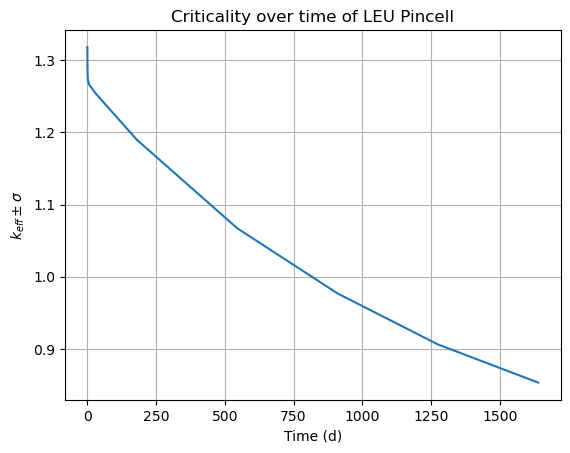

In [16]:
time,k = results.get_keff()
time /= (24*3600)

plt.errorbar(time,k[:,0],yerr=k[:,1])
plt.title('Criticality over time of LEU Pincell')
plt.xlabel("Time (d)")
plt.ylabel("$k_{eff} \pm \sigma$")
plt.grid()

Text(0, 0.5, 'Number of atoms')

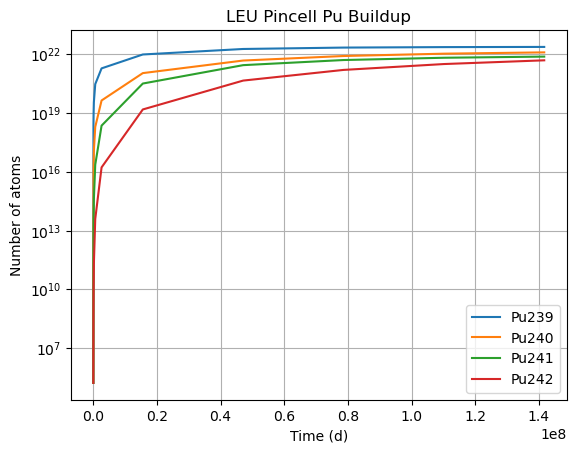

In [11]:
time, Pu239 = results.get_atoms("1","Pu239")
time, Pu240 = results.get_atoms("1","Pu240")
time, Pu241 = results.get_atoms("1","Pu241")
time, Pu242 = results.get_atoms("1","Pu242")

plt.semilogy(time,Pu239,label="Pu239")
plt.semilogy(time,Pu240,label="Pu240")
plt.semilogy(time,Pu241,label="Pu241")
plt.semilogy(time,Pu242,label="Pu242")
plt.legend()
plt.grid()
plt.title("LEU Pincell Pu Buildup")
plt.xlabel("Time (d)")
plt.ylabel("Number of atoms")

Text(0, 0.5, 'Fraction Pu239')

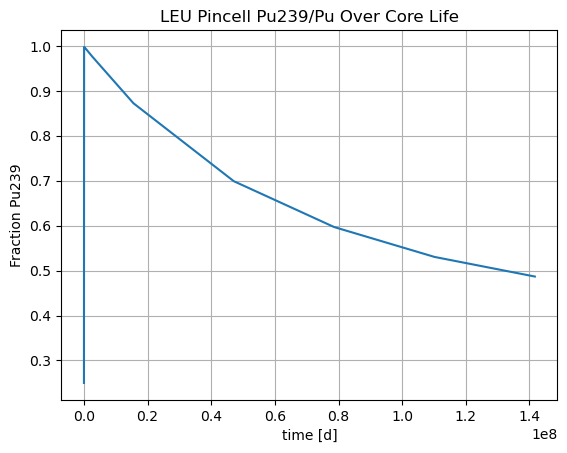

In [13]:
total_pu = Pu239 + Pu240 + Pu241 + Pu242
Pu239_frac = Pu239/total_pu

plt.plot(time,Pu239_frac,label="Fraction Pu239")
plt.grid()
plt.title("LEU Pincell Pu239/Pu Over Core Life")
plt.xlabel("time [d]")
plt.ylabel("Fraction Pu239")